In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
pennsylvania_grids = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_prism_grids/grids.shp')

In [4]:
#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/spatially_explicit_reproduction_with_max_eggs.csv')

#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/spatially_explicit_reproduction_v1.csv')

#data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/spatially_explicit_reproduction_with_max_eggs_with_foraging_quality_1mm_precip_threshold.csv')

data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/emergence_reproduction_13_9C_1mm.csv')

In [5]:
data["geometry"] = pennsylvania_grids["geometry"]
data = gpd.GeoDataFrame(data)

In [6]:
data.reproduction_2008.tolist()

["{'eggs': 28, 'non_foraging_days': 6, 'precipitation_effect': 5, 'temperature_effect': 2, 'temps': [17.4890003204346, 23.9640007019043, 27.3610019683838, 24.302001953125, 24.2520008087158, 24.0110015869141, 19.9100017547607, 20.3440017700195, 23.8270015716553, 24.0710010528564, 18.5480003356934, 20.9520015716553, 17.701000213623, 13.7390003204346, 13.2710008621216, 15.238000869751, 18.496000289917, 19.4600009918213, 18.0790004730225, 17.3470001220703], 'ppts': [0.0, 4.49200010299683, 0.0, 0.0, 0.0240000002086163, 8.62899971008301, 11.5970001220703, 0.0, 1.23000001907349, 17.4179992675781, 0.99099999666214, 0.703999996185303, 0.741999983787537, 7.11399984359741, 0.948000013828278, 3.16400003433228, 1.77900004386902, 7.65299987792969, 0.75900000333786, 0.0]}",
 "{'eggs': 28, 'non_foraging_days': 6, 'precipitation_effect': 5, 'temperature_effect': 1, 'temps': [17.7400016784668, 17.6680011749268, 24.0670013427734, 27.4790019989014, 24.427001953125, 24.3950004577637, 24.1940002441406, 20.0

In [7]:
data1 = data.copy()

In [8]:
num_years = 16
for i in range(num_years):
    year = 2008 + i
    data1[f"eggs_{year}"] = [eval(x)['eggs'] for x in data1[f"reproduction_{year}"].tolist()]


for i in range(num_years):
    year = 2008 + i
    data1[f"precip_effect_{year}"] = [eval(x)['precipitation_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = 2008 + i
    data1[f"temp_effect_{year}"] = [eval(x)['temperature_effect'] for x in data1[f"reproduction_{year}"].tolist()]

for i in range(num_years):
    year = 2008 + i
    data1[f"no_foraging_days_{year}"] = [eval(x)['non_foraging_days'] for x in data1[f"reproduction_{year}"].tolist()]

data1

,col,row,grid_id,emergence_2008,reproduction_2008,emergence_2009,reproduction_2009,emergence_2010,reproduction_2010,emergence_2011,...,no_foraging_days_2014,no_foraging_days_2015,no_foraging_days_2016,no_foraging_days_2017,no_foraging_days_2018,no_foraging_days_2019,no_foraging_days_2020,no_foraging_days_2021,no_foraging_days_2022,no_foraging_days_2023
0,1083,184,1083_184,2008-06-03,"{'eggs': 28, 'non_foraging_days': 6, 'precipit...",2009-05-29,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2010-05-26,"{'eggs': 30, 'non_foraging_days': 5, 'precipit...",2011-06-01,...,7,8,6,5,5,8,4,5,7,5
1,1084,184,1084_184,2008-06-02,"{'eggs': 28, 'non_foraging_days': 6, 'precipit...",2009-05-28,"{'eggs': 22, 'non_foraging_days': 9, 'precipit...",2010-05-25,"{'eggs': 28, 'non_foraging_days': 6, 'precipit...",2011-05-31,...,8,8,6,6,5,8,4,6,7,5
2,1085,184,1085_184,2008-05-28,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2009-05-25,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2010-05-23,"{'eggs': 30, 'non_foraging_days': 5, 'precipit...",2011-05-29,...,8,8,7,8,4,7,5,6,6,5
3,1086,184,1086_184,2008-05-19,"{'eggs': 16, 'non_foraging_days': 12, 'precipi...",2009-05-24,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2010-05-20,"{'eggs': 30, 'non_foraging_days': 5, 'precipit...",2011-05-27,...,7,9,6,8,3,7,6,6,6,5
4,1081,185,1081_185,2008-06-03,"{'eggs': 28, 'non_foraging_days': 6, 'precipit...",2009-05-29,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2010-05-25,"{'eggs': 32, 'non_foraging_days': 4, 'precipit...",2011-05-31,...,8,10,4,9,4,10,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,1178,245,1178_245,2008-05-09,"{'eggs': 18, 'non_foraging_days': 11, 'precipi...",2009-05-10,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2010-05-02,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2011-05-05,...,8,6,8,10,7,7,5,8,5,7
7448,1179,245,1179_245,2008-05-08,"{'eggs': 16, 'non_foraging_days': 12, 'precipi...",2009-05-10,"{'eggs': 24, 'non_foraging_days': 8, 'precipit...",2010-05-02,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2011-05-05,...,7,6,8,10,7,7,5,7,5,7
7449,1180,245,1180_245,2008-05-07,"{'eggs': 18, 'non_foraging_days': 11, 'precipi...",2009-05-09,"{'eggs': 22, 'non_foraging_days': 9, 'precipit...",2010-05-01,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2011-05-04,...,6,6,8,10,8,7,6,8,3,7
7450,1181,245,1181_245,2008-05-07,"{'eggs': 18, 'non_foraging_days': 11, 'precipi...",2009-05-08,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2010-04-30,"{'eggs': 26, 'non_foraging_days': 7, 'precipit...",2011-05-04,...,6,5,6,9,9,8,5,8,3,7


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_40190/3552242391.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


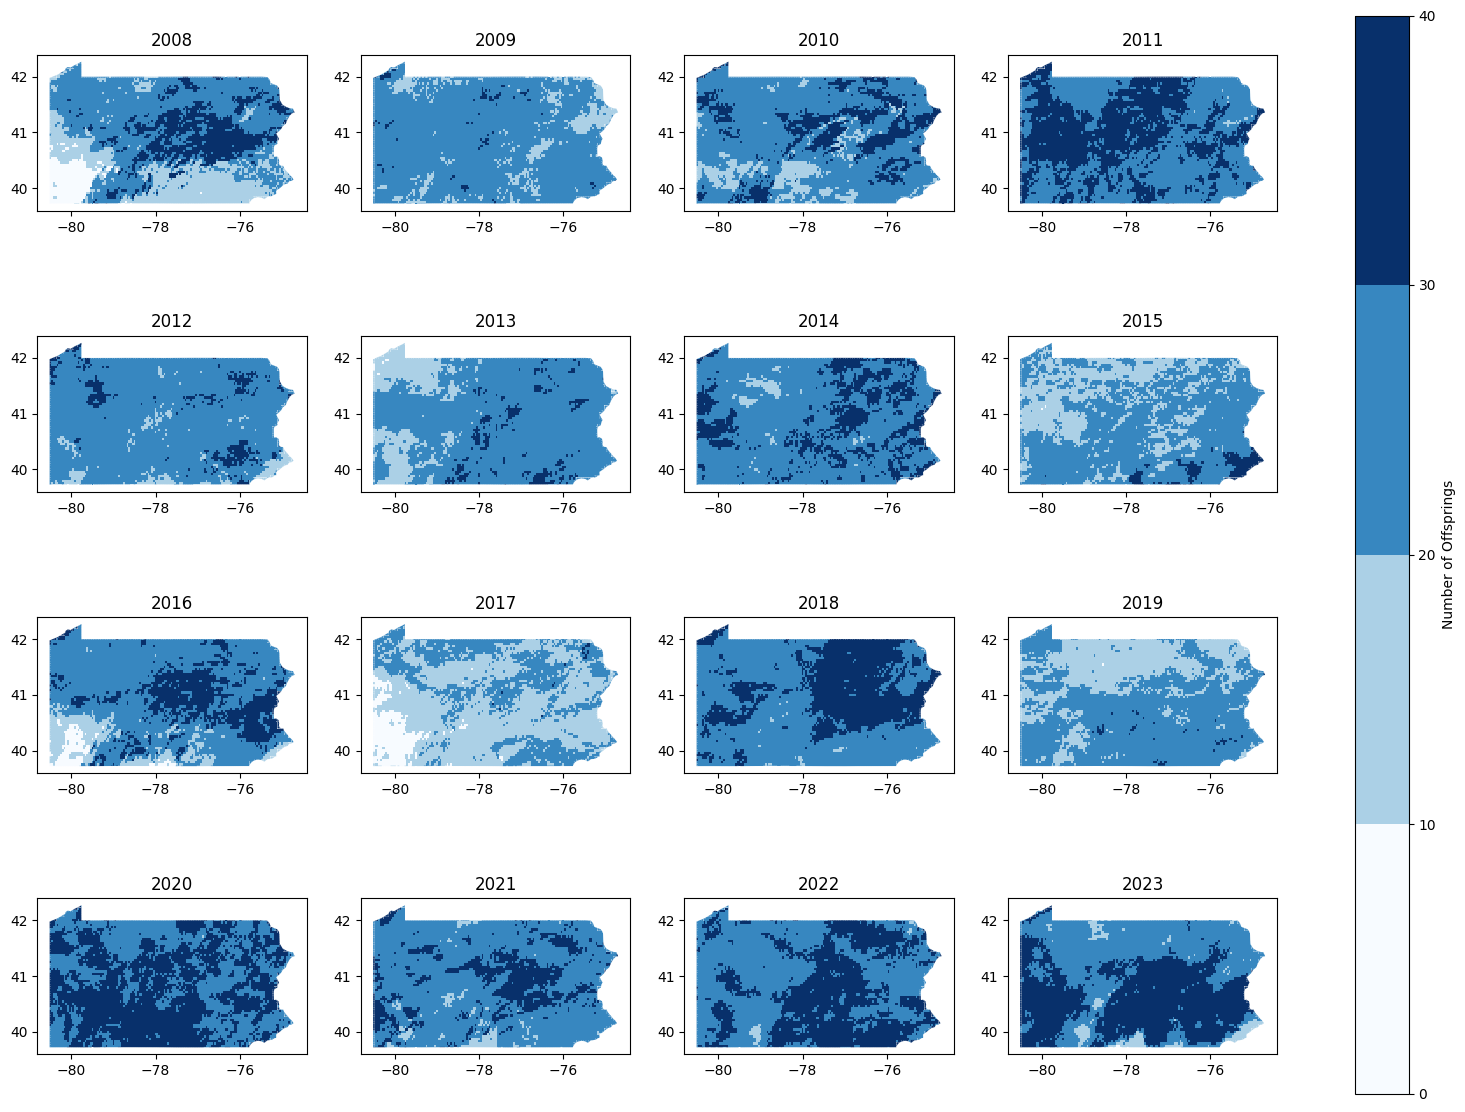

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 10, 20, 30, 40]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(20, 14))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2008 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'eggs_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    ax.set_title(str(year))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Number of Offsprings')  # label for the colorbar

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [10]:
data1.describe()[["precip_effect_2008", "precip_effect_2009", "precip_effect_2010", "precip_effect_2011", "precip_effect_2012", "precip_effect_2013", "precip_effect_2014", "precip_effect_2015", "precip_effect_2016", "precip_effect_2017", "precip_effect_2018", "precip_effect_2019", "precip_effect_2020", "precip_effect_2021"]]

,precip_effect_2008,precip_effect_2009,precip_effect_2010,precip_effect_2011,precip_effect_2012,precip_effect_2013,precip_effect_2014,precip_effect_2015,precip_effect_2016,precip_effect_2017,precip_effect_2018,precip_effect_2019,precip_effect_2020,precip_effect_2021
count,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000
mean,5.174047,4.707327,4.128422,4.453972,4.217123,4.259528,4.710413,4.581455,4.529791,5.127885,4.872249,6.848497,3.298712,4.021605
std,1.932954,1.596394,1.639996,1.823335,1.442714,1.394723,1.624908,1.794635,1.565138,1.460302,2.314907,1.541967,1.224338,1.643814
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,6.000000,2.000000,3.000000
50%,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,7.000000,3.000000,4.000000
75%,7.000000,6.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.250000,6.000000,7.000000,8.000000,4.000000,5.000000
max,12.000000,11.000000,9.000000,10.000000,10.000000,9.000000,10.000000,11.000000,12.000000,10.000000,12.000000,12.000000,7.000000,9.000000


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_40190/58373249.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


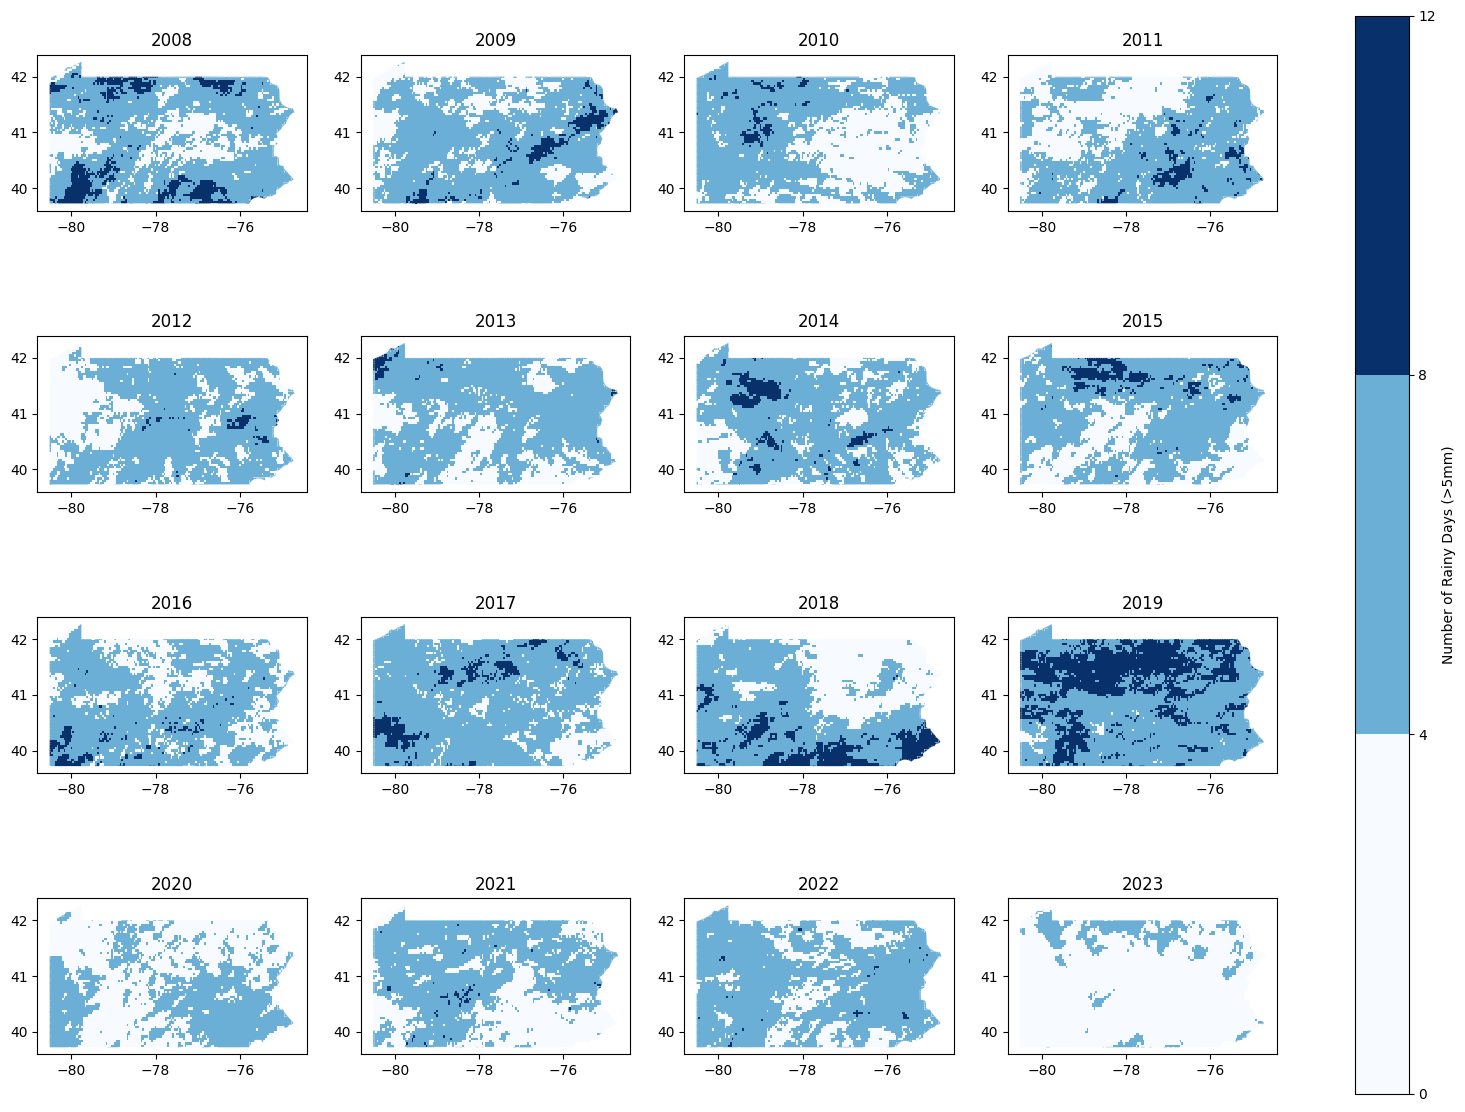

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 4, 8, 12]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(20, 14))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2008 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'precip_effect_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    ax.set_title(str(year))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Number of Rainy Days (>5mm)')  # label for the colorbar

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [12]:
data1.describe()[["temp_effect_2008", "temp_effect_2009", "temp_effect_2010", "temp_effect_2011", "temp_effect_2012", "temp_effect_2013", "temp_effect_2014", "temp_effect_2015", "temp_effect_2016", "temp_effect_2017", "temp_effect_2018", "temp_effect_2019", "temp_effect_2020", "temp_effect_2021"]]
#data1.describe()[["precip_effect_2008", "precip_effect_2009", "precip_effect_2010", "precip_effect_2011", "precip_effect_2012", "precip_effect_2013", "precip_effect_2014", "precip_effect_2015", "precip_effect_2016", "precip_effect_2017", "precip_effect_2018", "precip_effect_2019", "precip_effect_2020", "precip_effect_2021"]]

,temp_effect_2008,temp_effect_2009,temp_effect_2010,temp_effect_2011,temp_effect_2012,temp_effect_2013,temp_effect_2014,temp_effect_2015,temp_effect_2016,temp_effect_2017,temp_effect_2018,temp_effect_2019,temp_effect_2020,temp_effect_2021
count,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000
mean,5.104133,5.073403,4.927268,1.527509,4.283816,4.596350,2.099571,5.321524,4.418680,8.730005,1.776973,3.984836,2.026570,4.366747
std,4.544789,1.136080,2.746982,1.440790,1.881923,1.794421,1.039685,1.401326,3.221391,3.105853,1.420904,1.331372,1.130627,2.071617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
25%,2.000000,4.000000,3.000000,0.000000,3.000000,3.000000,1.000000,5.000000,2.000000,6.000000,1.000000,3.000000,1.000000,3.000000
50%,3.000000,5.000000,4.000000,1.000000,4.000000,4.000000,2.000000,5.000000,4.000000,9.000000,2.000000,4.000000,2.000000,3.000000
75%,9.000000,6.000000,8.000000,3.000000,5.000000,6.000000,3.000000,6.000000,6.000000,11.000000,3.000000,5.000000,3.000000,5.000000
max,17.000000,8.000000,12.000000,5.000000,11.000000,9.000000,5.000000,8.000000,16.000000,15.000000,7.000000,8.000000,8.000000,11.000000


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_40190/1868771090.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


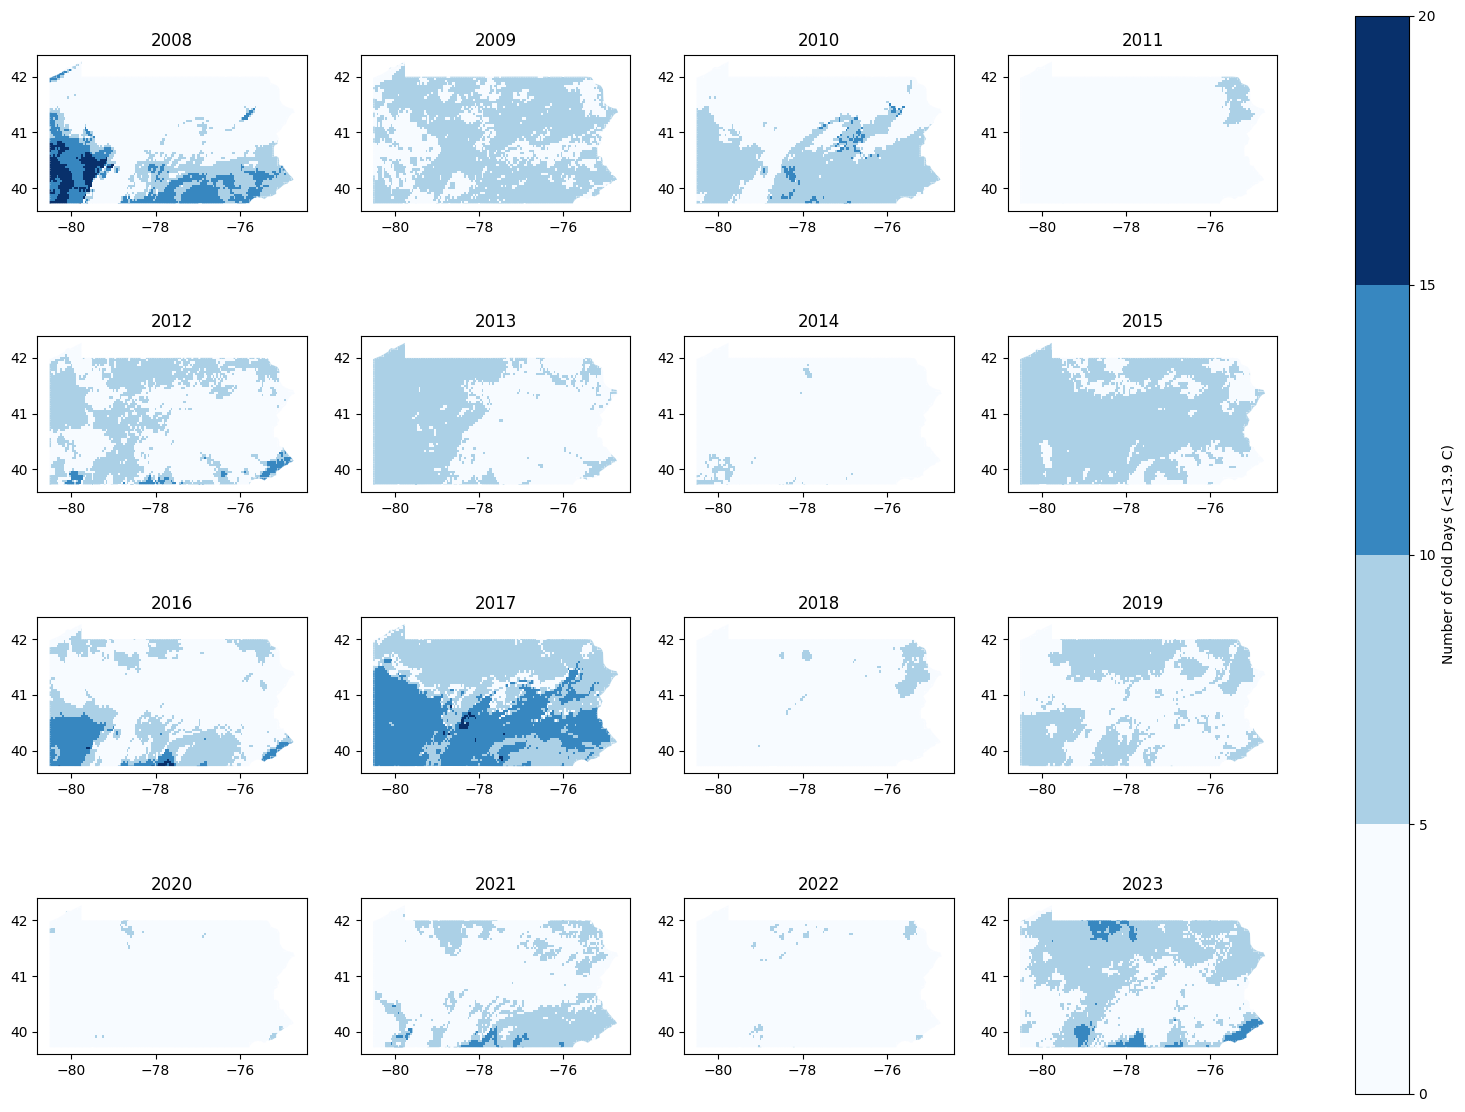

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
bins = [0, 5, 10, 15, 20]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(20, 14))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2008 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'temp_effect_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    ax.set_title(str(year))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Number of Cold Days (<13.9 C)')  # label for the colorbar

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [14]:
def getJulianDay(emergence):
    emergence = datetime.strptime(emergence, '%Y-%m-%d').date()
    starting_date = datetime.strptime(f'{emergence.year}-01-01', '%Y-%m-%d').date()
    return (emergence - starting_date).days + 1

In [15]:
###################### Trend Analysis for Pennsylvania ######################

In [16]:
### extract the data for each year
non_foraging_days = []
emergence_dates = []
precip_effect_days = []
temp_effect_days = []
years = []  
offsprings = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # non_foraging days
    non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"no_foraging_days_{year}"].tolist()))
    # emergence date
    emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # precip_effect_days
    precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # temp_effect_days
    temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(data1[f"eggs_{year}"].tolist())


In [17]:
df_pa = pd.DataFrame({'Year': years, 'Non_Foraging_Days': non_foraging_days, 'Emergence': emergence_dates, 'Precipitation_Effect': precip_effect_days, 'Temperature_Effect': temp_effect_days, 'Offsprings': offsprings})

In [18]:
df_pa['Julian_Day'] = df_pa['Emergence'].apply(getJulianDay)

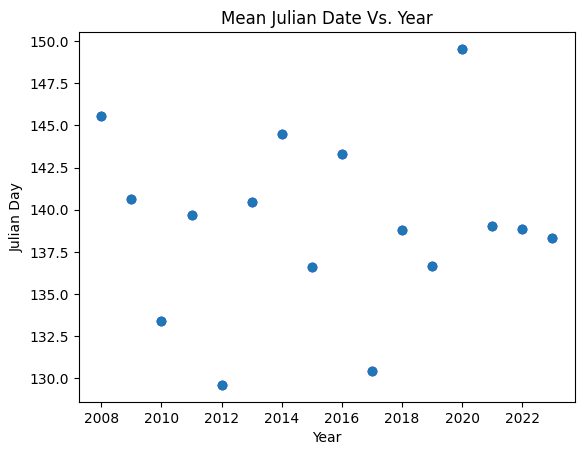

In [19]:
# Calculate the trendline equation

years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Julian_Day"]].groupby('Year').mean()["Julian_Day"].tolist()

plt.scatter(years, vals, color='blue')

# Plot the scatter plot
plt.scatter(years, vals)
plt.xlabel('Year')
plt.ylabel('Julian Day')
plt.title('Mean Julian Date Vs. Year')


# Show the plot
plt.show()


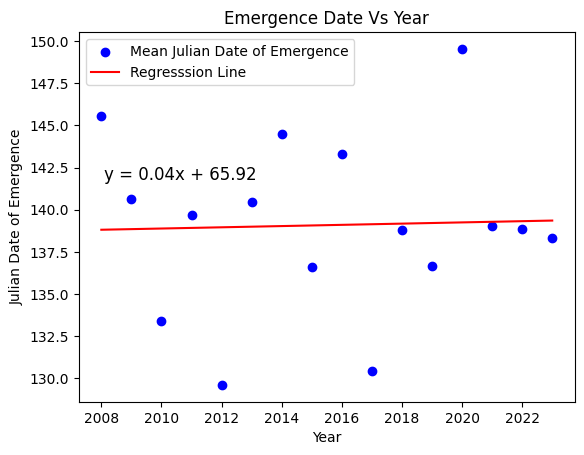

In [20]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Julian_Day"]].groupby('Year').mean()["Julian_Day"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Julian Date of Emergence")
plt.xlabel('Year')
plt.ylabel('Julian Date of Emergence')
plt.title('Emergence Date Vs Year')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12, color='black')

# Show the plot with legend
plt.legend()
plt.show()


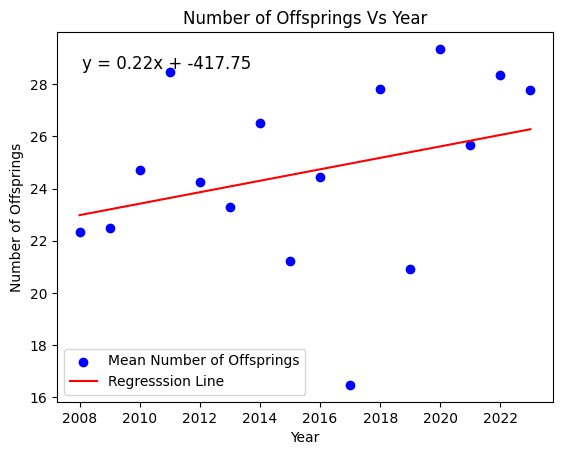

In [21]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
vals = df_pa[["Year","Offsprings"]].groupby('Year').mean()["Offsprings"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Offsprings")
plt.xlabel('Year')
plt.ylabel('Number of Offsprings')
plt.title('Number of Offsprings Vs Year')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

# Show the plot with legend
plt.legend()
plt.show()


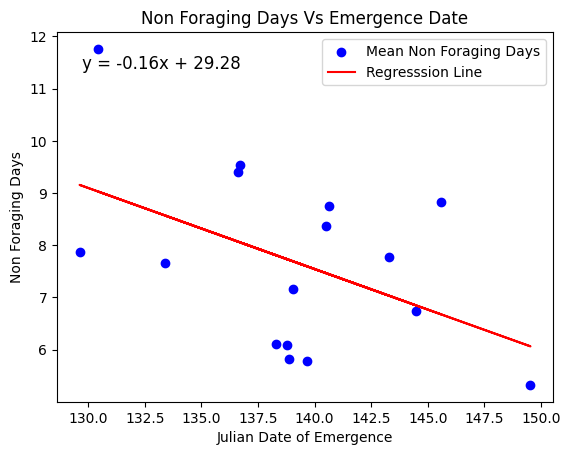

In [22]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa[["Year","Julian_Day", "Non_Foraging_Days"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Non_Foraging_Days"]].groupby('Year').mean()["Non_Foraging_Days"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Non Foraging Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Non Foraging Days')
plt.title('Non Foraging Days Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

# Show the plot with legend
plt.legend()
plt.show()


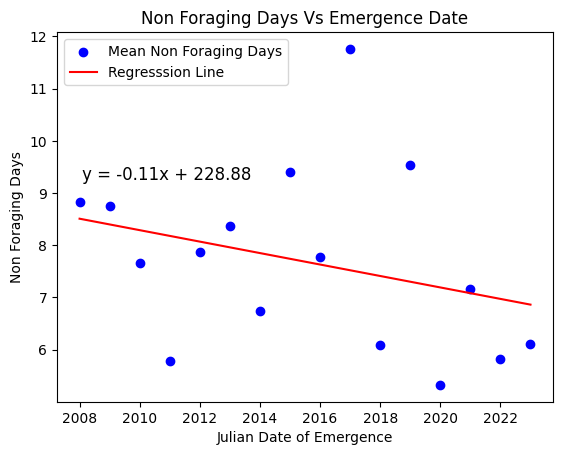

In [23]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years =  df_pa["Year"].unique().tolist()
#df_pa[["Year","Julian_Day", "Non_Foraging_Days"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Non_Foraging_Days"]].groupby('Year').mean()["Non_Foraging_Days"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Non Foraging Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Non Foraging Days')
plt.title('Non Foraging Days Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12, color='black')

# Show the plot with legend
plt.legend()
plt.show()


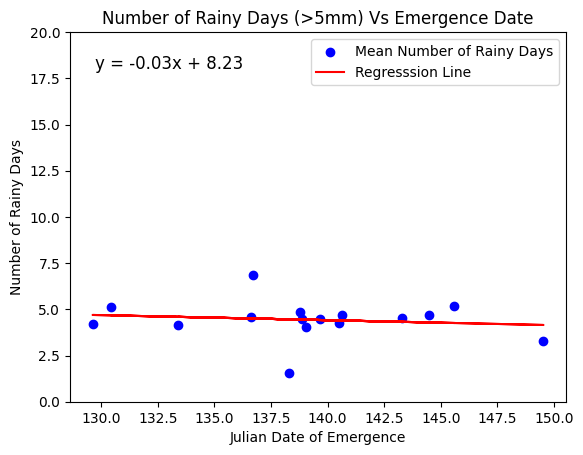

In [24]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa[["Year","Julian_Day", "Precipitation_Effect"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Precipitation_Effect"]].groupby('Year').mean()["Precipitation_Effect"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Rainy Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Rainy Days')
plt.title('Number of Rainy Days (>5mm) Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


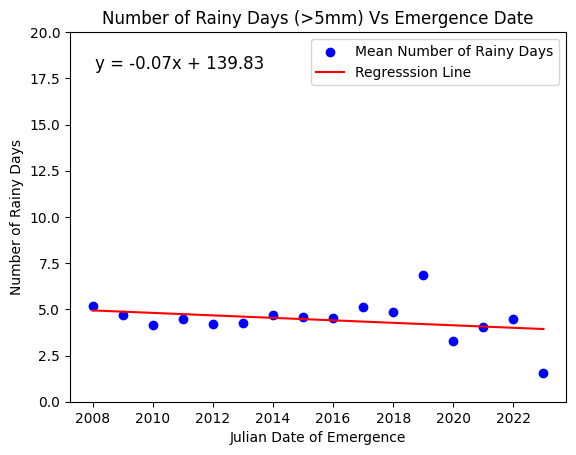

In [25]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
df_pa[["Year","Julian_Day", "Precipitation_Effect"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Precipitation_Effect"]].groupby('Year').mean()["Precipitation_Effect"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Rainy Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Rainy Days')
plt.title('Number of Rainy Days (>5mm) Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


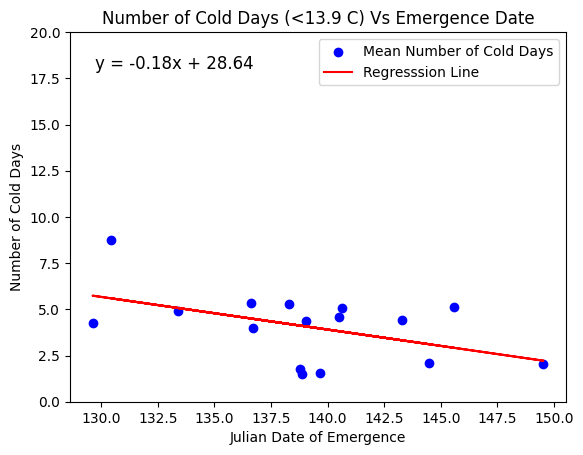

In [26]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa[["Year","Julian_Day", "Temperature_Effect"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Temperature_Effect"]].groupby('Year').mean()["Temperature_Effect"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Cold Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Cold Days')
plt.title('Number of Cold Days (<13.9 C) Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


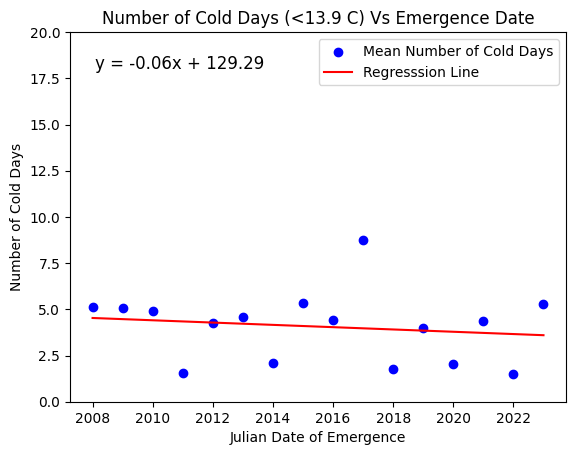

In [27]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist() #df_pa[["Year","Julian_Day", "Temperature_Effect"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Temperature_Effect"]].groupby('Year').mean()["Temperature_Effect"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Cold Days")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Cold Days')
plt.title('Number of Cold Days (<13.9 C) Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')

plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


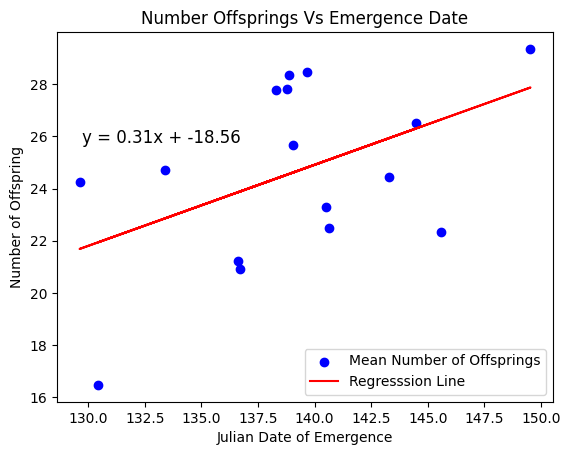

In [28]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa[["Year","Julian_Day", "Offsprings"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Offsprings"]].groupby('Year').mean()["Offsprings"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Offsprings")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Offspring')
plt.title('Number Offsprings Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12, color='black')

#plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


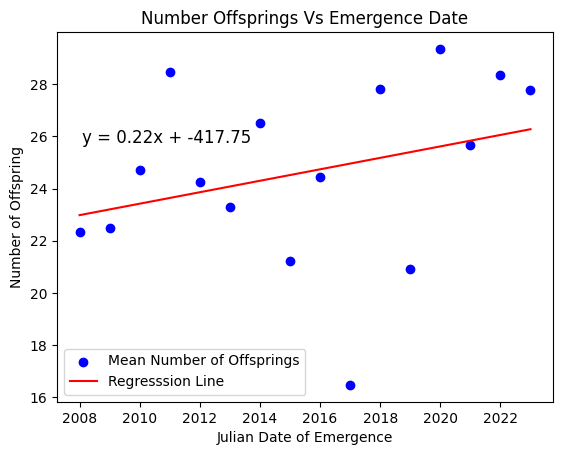

In [29]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_pa["Year"].unique().tolist()
df_pa[["Year","Julian_Day", "Offsprings"]].groupby('Year').mean()["Julian_Day"].tolist()
vals = df_pa[["Year","Julian_Day", "Offsprings"]].groupby('Year').mean()["Offsprings"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Number of Offsprings")
plt.xlabel('Julian Date of Emergence')
plt.ylabel('Number of Offspring')
plt.title('Number Offsprings Vs Emergence Date')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12, color='black')

#plt.ylim(0, 20)

# Show the plot with legend
plt.legend()
plt.show()


In [30]:
##################### State College, PA ######################

In [31]:
# state college

lat = 40.793425

long = -77.860316

In [32]:
from shapely.geometry import Point



# Check if the coordinates intersect with any column
intersected_columns = pennsylvania_grids[pennsylvania_grids.geometry.contains(Point(long, lat))]

# Print the intersected columns
print(intersected_columns)


       col  row     lon        lat  \
3980  1131  219 -77.875  40.791667   

                                               geometry  
3980  POLYGON ((-77.89583 40.77083, -77.89583 40.812...  


In [33]:
# state college grid
col = 1131
row = 219

In [34]:
st_data = data1[data1['grid_id'] == '1131_219']

In [35]:
### extract the data for each year
non_foraging_days = []
emergence_dates = []
precip_effect_days = []
temp_effect_days = []
years = []  
offsprings = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # non_foraging days
    non_foraging_days.extend(st_data[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(st_data[f"no_foraging_days_{year}"].tolist()))
    # emergence date
    emergence_dates.extend(st_data[f"emergence_{year}"].tolist())
    # precip_effect_days
    precip_effect_days.extend(st_data[f"precip_effect_{year}"].tolist())
    # temp_effect_days
    temp_effect_days.extend(st_data[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(st_data[f"eggs_{year}"].tolist())


In [36]:
df_st = pd.DataFrame({'Year': years, 'Non_Foraging_Days': non_foraging_days, 'Emergence': emergence_dates, 'Precipitation_Effect': precip_effect_days, 'Temperature_Effect': temp_effect_days, 'Offsprings': offsprings})

In [37]:
df_st['Julian_Day'] = df_st['Emergence'].apply(getJulianDay)

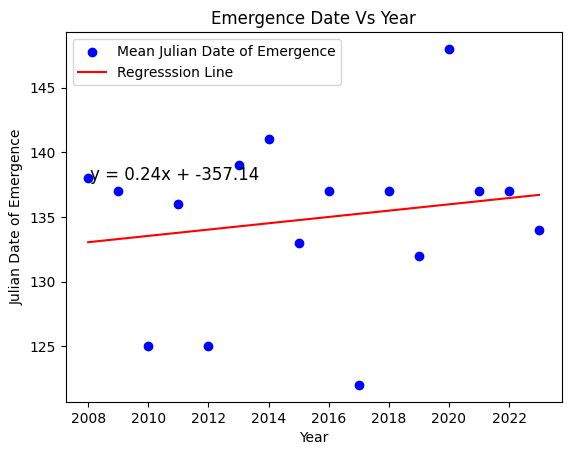

In [38]:
import numpy as np
from scipy.stats import linregress

# Your existing code to create the scatter plot
years = df_st["Year"].unique().tolist()
vals = df_st[["Year","Julian_Day"]].groupby('Year').mean()["Julian_Day"].tolist()
plt.scatter(years, vals, color='blue', label="Mean Julian Date of Emergence")
plt.xlabel('Year')
plt.ylabel('Julian Date of Emergence')
plt.title('Emergence Date Vs Year')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, vals)

# Plot trend line
plt.plot(years, intercept + slope * np.array(years), color='red', label='Regresssion Line')

# Equation of the line
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the equation on the graph
plt.annotate(equation, xy=(0.05, 0.6), xycoords='axes fraction', fontsize=12, color='black')

# Show the plot with legend
plt.legend()
plt.show()
